In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt3

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt3.get_categ_info()

trial_data_all, subjects, cue_level_names, image_type_names = analyze_expt3.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition, dprime_by_condition, propyes_by_condition, rt_by_condition = analyze_expt3.get_perf_by_cond()

acc_by_run, dprime_by_run, rt_by_run = analyze_expt3.get_perf_by_run()

acc_by_supcat, dprime_by_supcat, rt_by_supcat = analyze_expt3.get_perf_by_supercateg()

acc_by_nat, dprime_by_nat, rt_by_nat = analyze_expt3.get_perf_by_nat()

print(subjects)

cue_level_names = ['Fine','Coarse']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


Text(0.5, 0.98, 'Response Time')

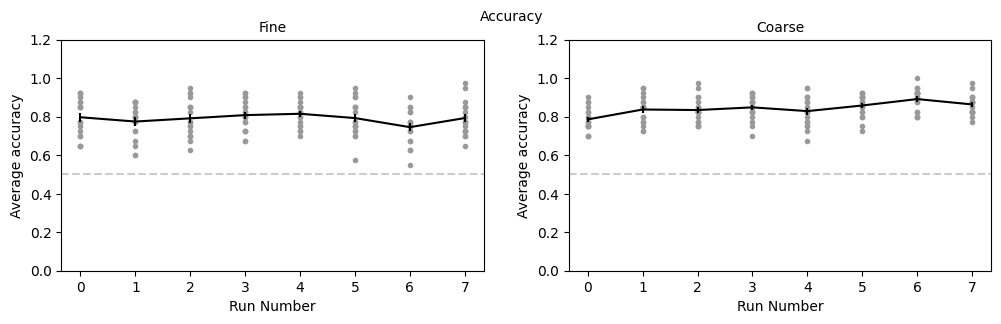

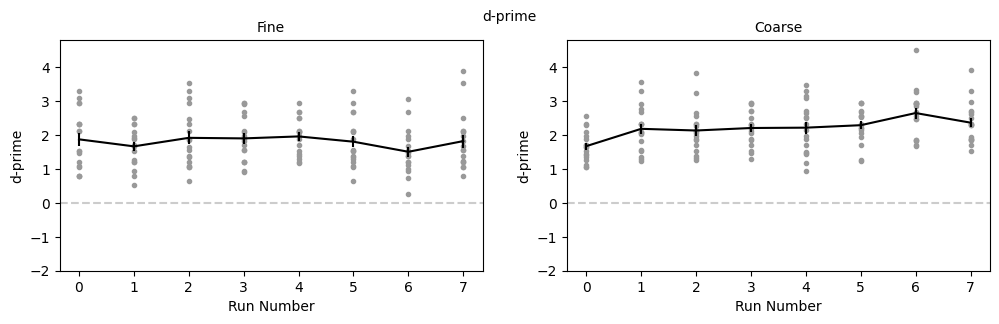

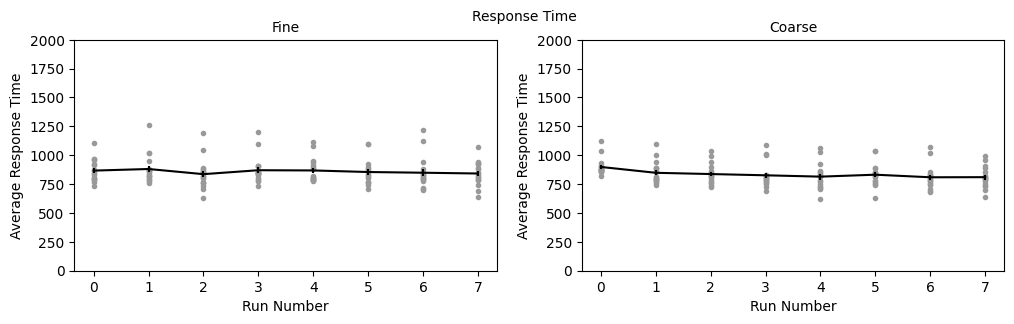

In [22]:
plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = acc_by_run[:,cc,:]
    
    n_runs = plot_vals.shape[1]
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('Average accuracy')
    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.ylim([0.0, 1.2])
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('Accuracy')




plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = dprime_by_run[:,cc,:]
    
    n_runs = plot_vals.shape[1]
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('d-prime')
    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.ylim([-2, 4.8])
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('d-prime')



plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = rt_by_run[:,cc,:]
    
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('Average Response Time')
    ylims = [0, 2000]
    plt.ylim(ylims)
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('Response Time')

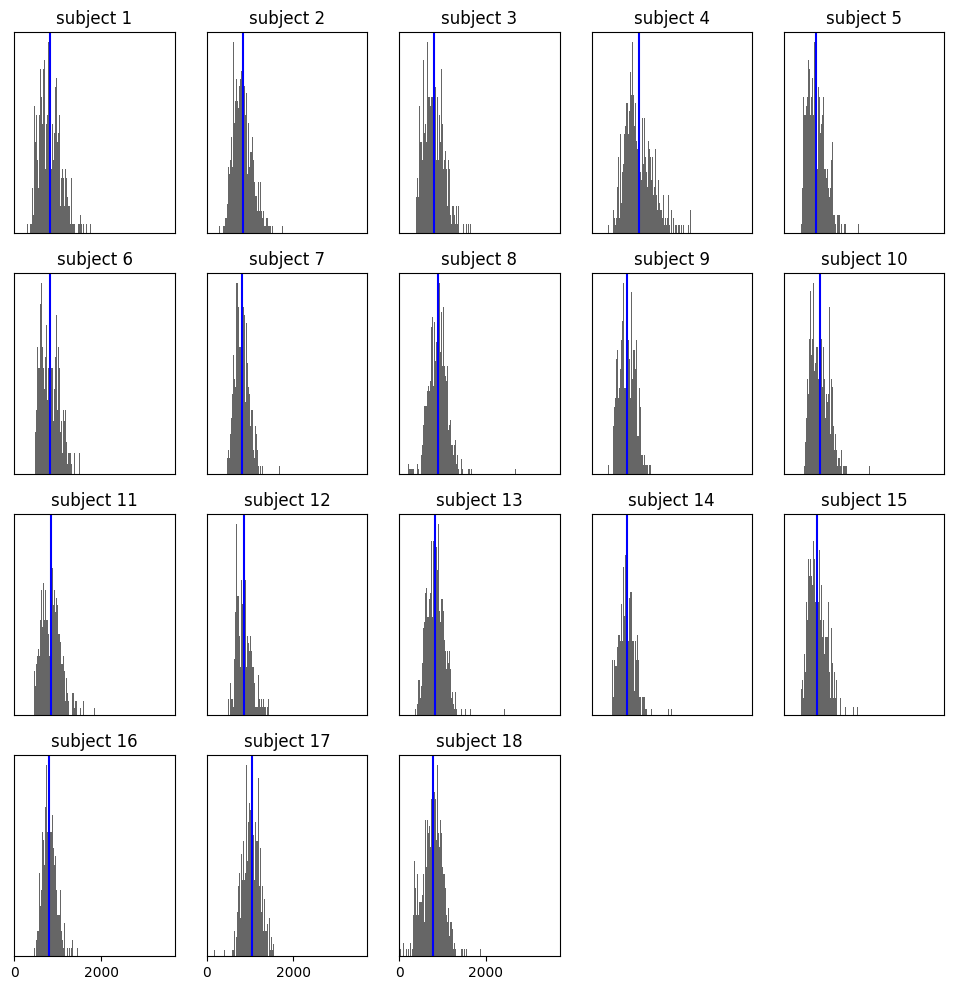

In [17]:
plt.figure(figsize=(12,12))
npy = int(np.ceil(np.sqrt(n_subjects)))
npx = int(np.ceil(n_subjects/npy))
xlims = [0, 500 + 1200 + 2000]

for si,ss in enumerate(subjects):

    plt.subplot(npx, npy, si+1)
    
    rts = np.array(trial_data_all['rt'])[trial_data_all['subject']==ss]
    
    rts = rts[~np.isnan(rts)]
    
    assert(np.all(rts<=xlims[1]))
    
    plt.hist(rts,100, color=[0.4, 0.4, 0.4]);
    
    plt.title('subject %d'%ss)
    
    plt.xlim(xlims)
    if si<((npx-1)*(npy)):
        plt.xticks([])
    plt.yticks([])
    
    plt.axvline(np.mean(rts), color='b')

In [16]:
np.max(rts)

2703.0

#### Plotting params

In [3]:
cue_level_colors = np.array([[130, 181, 216], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

#### Run stats on the d' values (combine all subjects/all image sets)

In [23]:
vals = dprime_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)

# then pairwise t-tests (fine vs coarse)
result = scipy.stats.ttest_rel(vals[:,0,:], vals[:,1,:], axis=0, alternative='two-sided')
tvals = result.statistic
pvals = result.pvalue

df = pd.DataFrame(index=image_type_names)
df['t (basic-super)'] = tvals.round(4)
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr

df


All subjects:
(18, 2, 5)
                    F Value  Num DF  Den DF        Pr > F
cond              37.332627     1.0    17.0  1.155355e-05
image_type       227.751530     4.0    68.0  1.356214e-38
cond:image_type   10.265348     4.0    68.0  1.460146e-06


,t (basic-super),p
pool1,-3.9082,0.001886
pool2,-4.3200,0.001161
pool3,-2.4030,0.034946
pool4,-5.6034,0.000158
orig,0.9924,0.334902


#### Plot d' values

Text(0.5, 1.0, 'All subjects (n=18)')

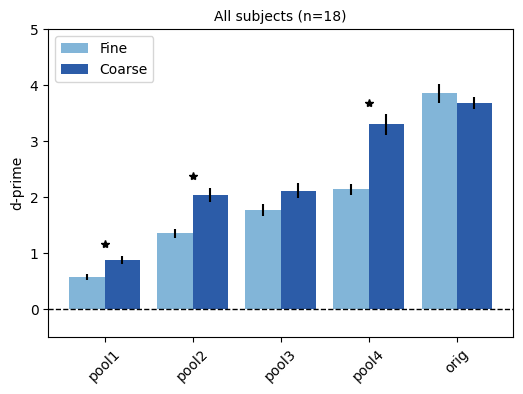

In [24]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = dprime_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals_fdr[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+0.20
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

plt.ylim([-.5, 5.0])
# assert(np.all(vals<5.0))
# assert(np.all(vals>-0.5))

ax.legend(lh, cue_level_names, loc='upper left')

plt.ylabel('d-prime')

plt.title('All subjects (n=%d)'%(n_subs_plot))

#### Check if d' is above chance for each condition

In [25]:
result = scipy.stats.ttest_1samp(dprime_by_condition, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
print(tvals)
print(pvals_fdr.round(6))
np.all(pvals_fdr<0.01)

[[10.24546322 17.59501579 16.00917898 20.64111811 22.16450707]
 [11.96276578 15.55334296 15.62010318 17.27545747 35.20265154]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


True

#### pairwise comparisons across image types

In [26]:
pairs_test = list(itertools.combinations(np.arange(5),2))
n_pairs = len(pairs_test)
pair_names = ['%s vs %s'%(image_type_names[ii], image_type_names[jj]) for ii, jj in pairs_test]

tvals = np.zeros((n_pairs))
pvals = np.zeros((n_pairs))

df = pd.DataFrame(index=pair_names)

# averaging across basic/super conds here
vals = np.mean(dprime_by_condition, axis=1)

for pi, pair in enumerate(pairs_test):

    vals1 = vals[:,pair[0]]
    vals2 = vals[:,pair[1]]

    result = scipy.stats.ttest_rel(vals1, vals2, axis=0, alternative='two-sided')
    t = result.statistic
    p = result.pvalue
    # p, t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=123434+pi)

    tvals[pi] = t
    pvals[pi] = p

df['t'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr

df   

,t,p
pool1 vs pool2,-14.4440,1.125858e-10
pool1 vs pool3,-11.7325,2.365820e-09
pool1 vs pool4,-17.2075,1.147000e-11
pool1 vs orig,-27.5897,1.476424e-14
pool2 vs pool3,-3.3509,3.789212e-03
pool2 vs pool4,-9.5997,4.012072e-08
pool2 vs orig,-19.2715,2.741684e-12
pool3 vs pool4,-7.3947,1.163675e-06
pool3 vs orig,-15.1640,6.512932e-11
pool4 vs orig,-7.4640,1.157446e-06


#### Analyze RTs

In [28]:
vals = rt_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)

# then pairwise t-tests (fine vs coarse)
result = scipy.stats.ttest_rel(vals[:,0,:], vals[:,1,:], axis=0, alternative='two-sided')
t = result.statistic
p = result.pvalue

df = pd.DataFrame(index=image_type_names)
df['t (basic-super)'] = t.round(4)
_, pvals_fdr = stats_utils.fdr_keepshape(p, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr
df


All subjects:
(18, 2, 5)
                   F Value  Num DF  Den DF        Pr > F
cond              7.393479     1.0    17.0  1.458157e-02
image_type       49.059709     4.0    68.0  2.379863e-19
cond:image_type  18.906179     4.0    68.0  1.721987e-10


,t (basic-super),p
pool1,3.1427,0.007420
pool2,3.6248,0.004720
pool3,3.4854,0.004720
pool4,3.8011,0.004720
orig,-2.8853,0.010278


#### plot RTs, all subjects

Text(0.5, 1.0, 'All subjects (n=18)')

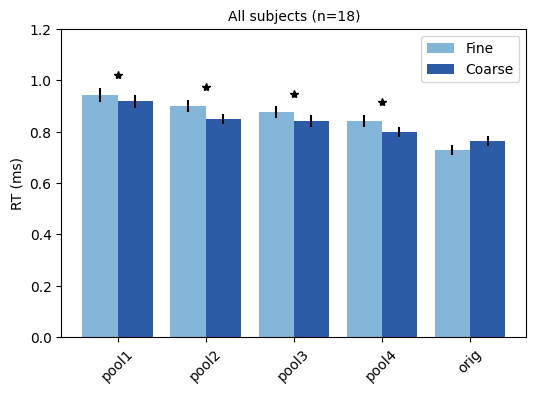

In [29]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = rt_by_condition/1000

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals_fdr[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+0.05
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

# plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('RT (ms)')

plt.ylim([0, 1.200])

plt.title('All subjects (n=%d)'%(n_subs_plot))

#### pairwise comparisons across image types

In [30]:

pairs_test = list(itertools.combinations(np.arange(5),2))
n_pairs = len(pairs_test)
pair_names = ['%s vs %s'%(image_type_names[ii], image_type_names[jj]) for ii, jj in pairs_test]

tvals = np.zeros((n_pairs))
pvals = np.zeros((n_pairs))

df = pd.DataFrame(index=pair_names)


# averaging across basic/super conds here
vals = np.mean(rt_by_condition, axis=1)

for pi, pair in enumerate(pairs_test):

    vals1 = vals[:,pair[0]]
    vals2 = vals[:,pair[1]]

    result = scipy.stats.ttest_rel(vals1, vals2, axis=0, alternative='two-sided')
    t = result.statistic
    p = result.pvalue
    # p, t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=132433+pi)

    tvals[pi] = t
    pvals[pi] = p

df['t'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr


df   

,t,p
pool1 vs pool2,4.5388,3.229125e-04
pool1 vs pool3,4.5913,3.229125e-04
pool1 vs pool4,5.5680,5.667504e-05
pool1 vs orig,7.6526,1.661046e-06
pool2 vs pool3,2.9832,8.348609e-03
pool2 vs pool4,5.6909,5.306285e-05
pool2 vs orig,9.6254,9.005270e-08
pool3 vs pool4,4.8318,2.228915e-04
pool3 vs orig,10.2657,5.264067e-08
pool4 vs orig,10.8389,4.694932e-08


#### Response bias

Text(0.5, 1.0, 'All subjects (n=18)')

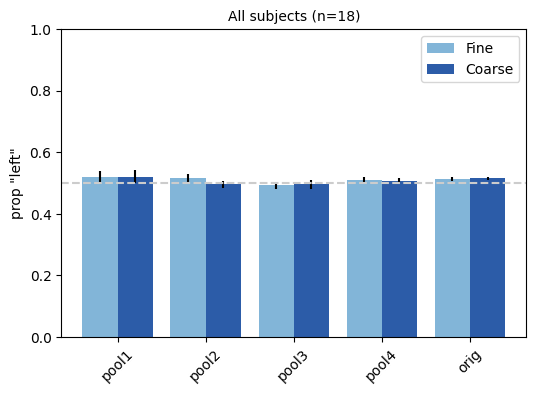

In [32]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = propyes_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

plt.axhline(0.5, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('prop "left"')

plt.ylim([0, 1.0])

plt.title('All subjects (n=%d)'%(n_subs_plot))

#### Natural versus artificial

In [35]:
tvals = np.zeros((n_image_types, n_cue_levels))
pvals = np.zeros((n_image_types, n_cue_levels))

dvals = dprime_by_nat;

df = pd.DataFrame(index=image_type_names)

vals = dvals

result = scipy.stats.ttest_rel(vals[:,:,:,0], vals[:,:,:,1], axis=0, alternative='two-sided')
# want [image types x cue levels]
tvals[:,:] = result.statistic.T
pvals[:,:] = result.pvalue.T
  
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

for cc, cue in enumerate(cue_level_names):

    df['%s: t'%(cue_level_names[cc])] = tvals[:,cc].round(4)

    df['%s: p'%(cue_level_names[cc])] = pvals_fdr[:,cc]

# print(df)
df

,Fine: t,Fine: p,Coarse: t,Coarse: p
pool1,-4.0612,0.004060,-1.7082,0.176318
pool2,-6.2980,0.000080,-3.4662,0.009843
pool3,-3.3299,0.009914,-1.9374,0.138982
pool4,0.0847,0.933486,-1.3515,0.242789
orig,1.5909,0.185791,0.3525,0.809810


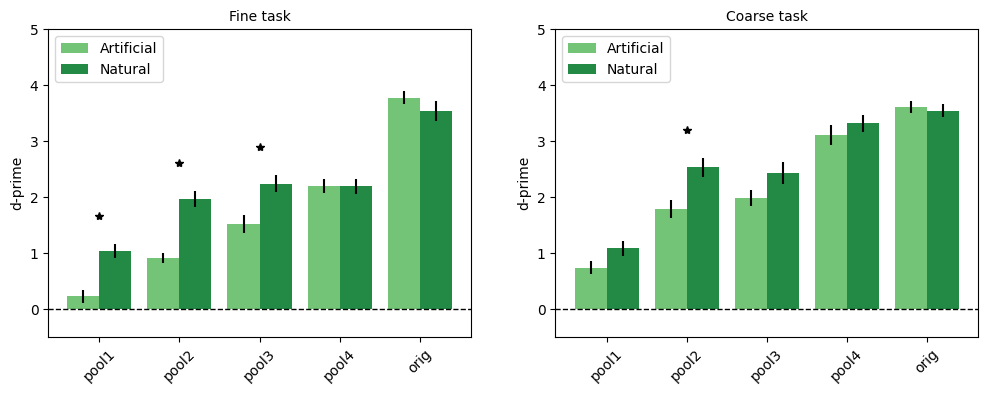

In [43]:
plot_utils.set_all_font_sizes(10)


nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

plt.figure(figsize=(12,4))
   
for cc in [0,1]:
    
    ax = plt.subplot(1,2,cc+1)
    
    vals = dprime_by_nat[:,cc,:,:]
    n_subs_plot = vals.shape[0]

    plot_vals = vals;
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    lh = []
    
    for kk in range(n_kinds):

        # for si in range(n_subs_plot):

        h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                 meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)
        
        plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                                 meanvals[:,kk], \
                                 semvals[:,kk], \
                                color = 'k', linestyle='none')
        lh.append(h)

    for ii in range(n_image_types):
        if pvals_fdr[ii,cc]<0.01:
            height = np.max(meanvals[ii,:]+semvals[ii,:])+0.50
            plt.plot(ii, height, '*', color='k')

    
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


    # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, kind_names, loc='upper left')

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])
        
    plt.title('%s task'%(cue_level_names[cc]))

#### Check if all d' values are above chance
In this experiment, some of these are actually not different from zero

In [44]:
df = pd.DataFrame(index=image_type_names)

vals = dprime_by_nat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

# print('(n=%d)'%(cb, vals.shape[0]))
# print(tvals)
print(np.all(pvals_fdr<0.01))

for cc in range(2):
    print(tvals[cc,:,:])
    for kk in range(2):
        df['%s, %s: p<0.01'%(cue_level_names[cc], kind_names[kk])] = \
            pvals_fdr[cc,:,kk]<0.01

df

False
[[ 1.96189147  8.32426685]
 [ 9.81297408 12.99494346]
 [ 9.33068054 14.7745266 ]
 [17.01880591 15.74203012]
 [31.46108367 19.56147098]]
[[ 6.38753552  7.86412303]
 [10.68206136 14.45072217]
 [13.21471195 12.08675973]
 [17.26740455 22.07759431]
 [34.0059083  29.27145593]]


,"Fine, Artificial: p<0.01","Fine, Natural: p<0.01","Coarse, Artificial: p<0.01","Coarse, Natural: p<0.01"
pool1,False,True,True,True
pool2,True,True,True,True
pool3,True,True,True,True
pool4,True,True,True,True
orig,True,True,True,True


#### Analyze individual super-categories

False


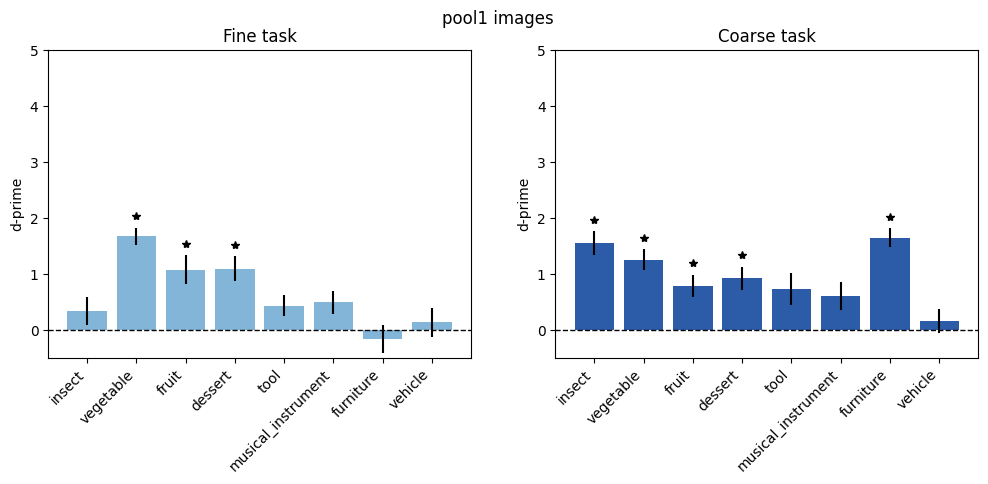

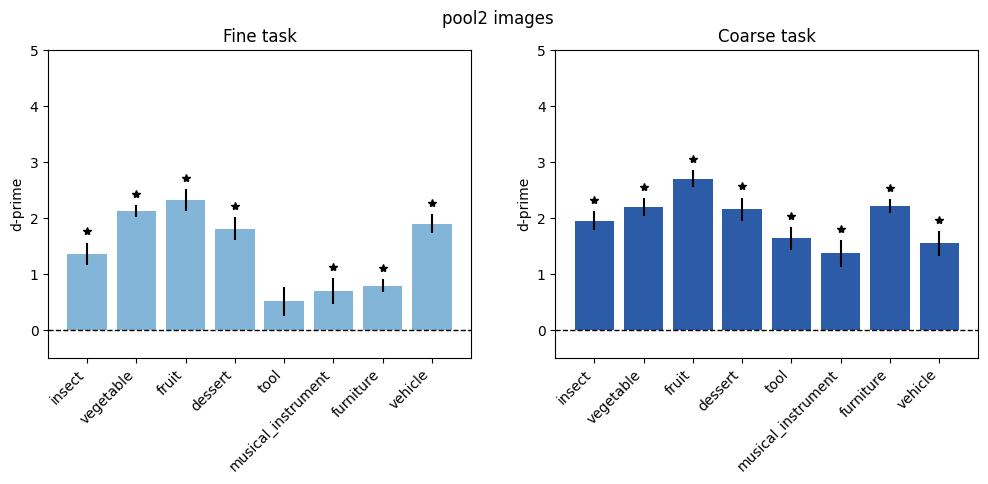

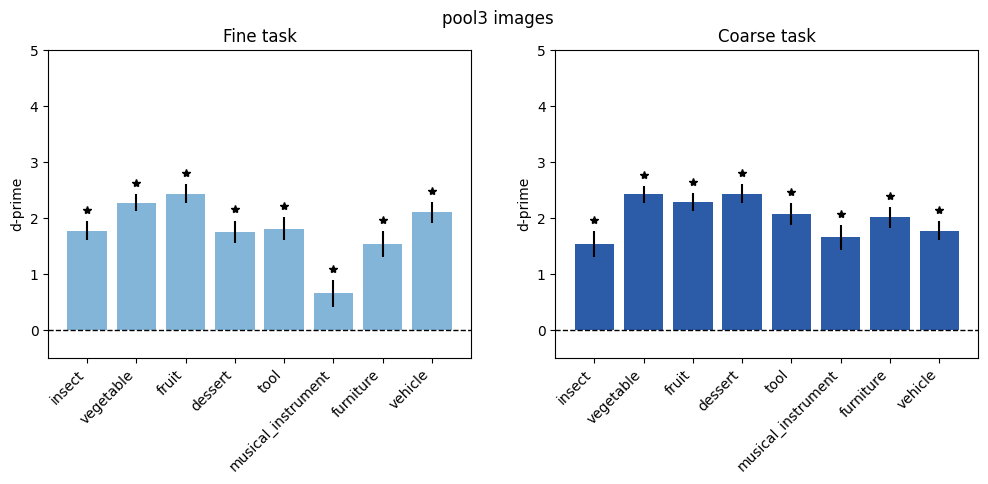

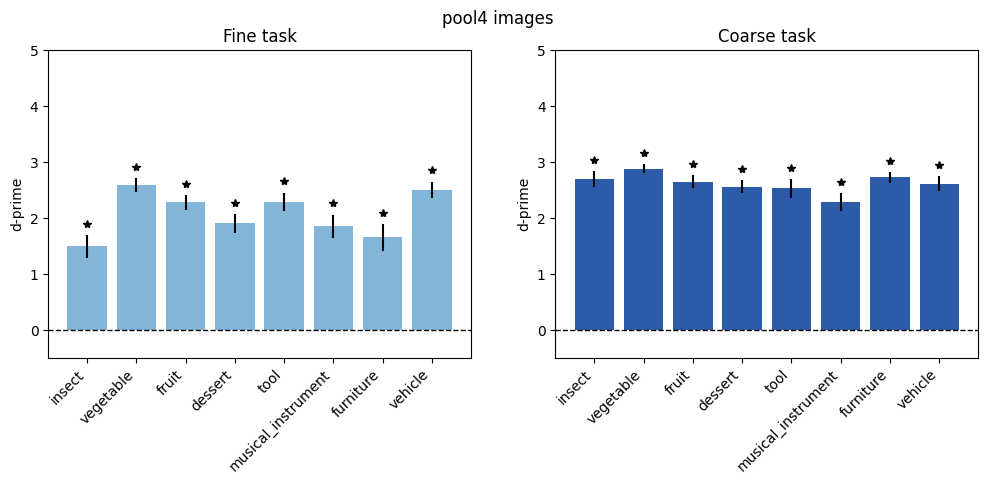

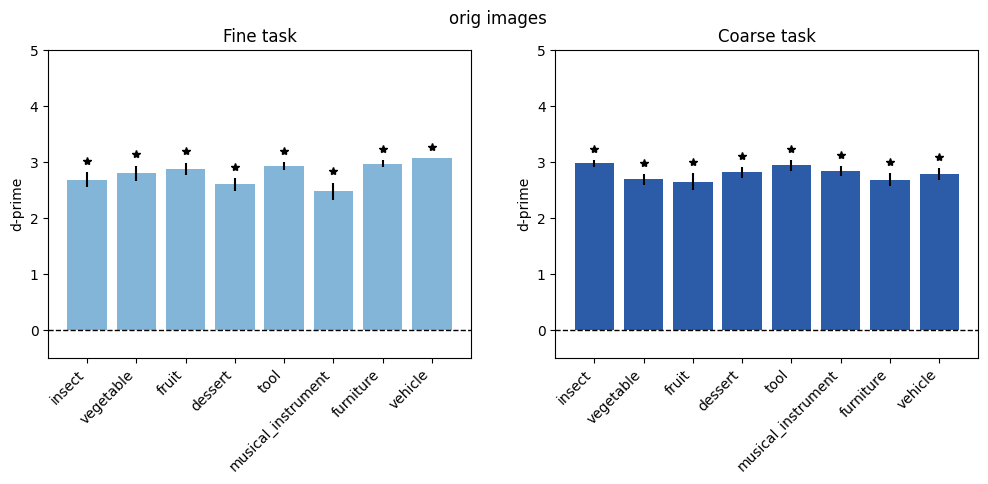

In [10]:

vals = dprime_by_supcat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

print(np.all(pvals_fdr<0.01))


for ii in range(5):


    plt.figure(figsize=(12,4))

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])
    
    for cc in [0,1]:
            
        ax = plt.subplot(1,2,cc+1)
    
        x = np.arange(n_super)

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:])

        # lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')

        # vals = d[:,cc,:]
        # t, p = scipy.stats.ttest_1samp(vals, popmean=0, alternative='greater')

        for sc in range(n_super):

            if pvals_fdr[cc,ii,sc]<0.01:
                height = meanvals[cc,sc]+semvals[cc,sc]+0.20
                plt.plot(x[sc], height, '*', color='k')
    
        plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right');
    
        plt.ylabel('d-prime')
    
        plt.axhline(0.0, color='k',
                # color=[0.8, 0.8, 0.8],
                linestyle='--', linewidth=1)
    
        plt.ylim([-.5, 5.0])

        plt.title('%s task'%cue_level_names[cc])
        # ax.legend(lh, cue_level_names, loc='upper left')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.suptitle('%s images'%(image_type_names[ii]))

False


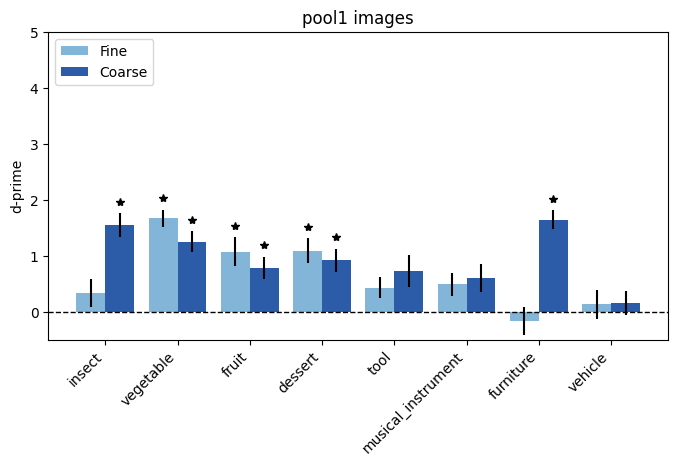

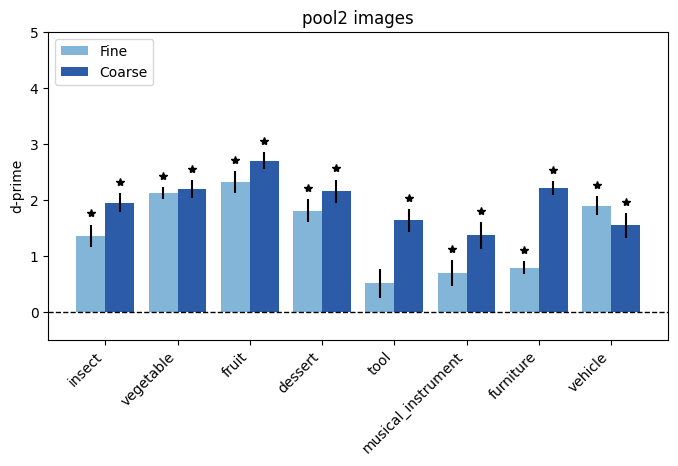

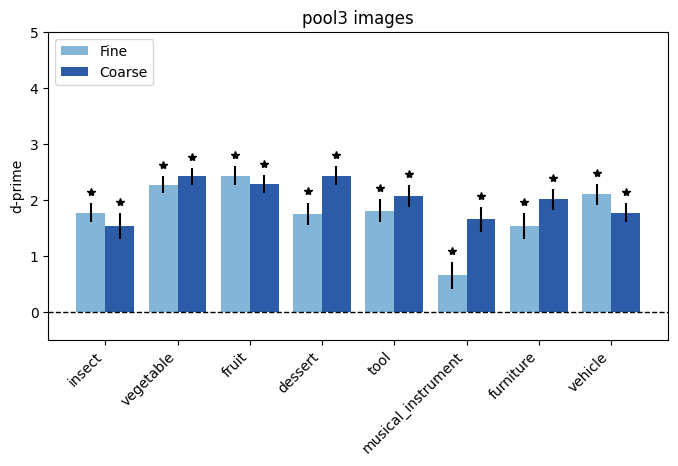

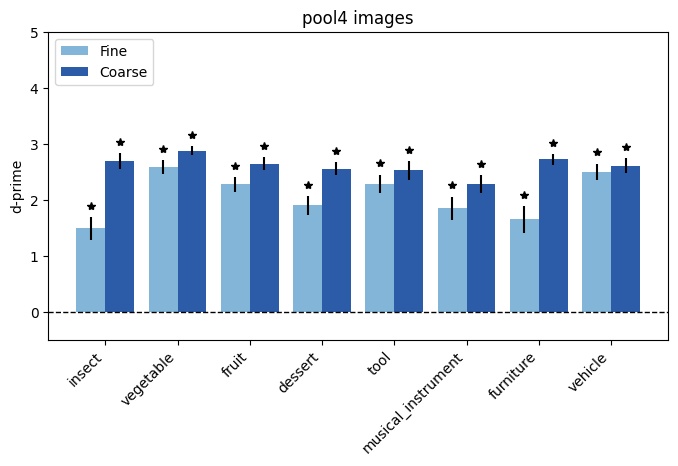

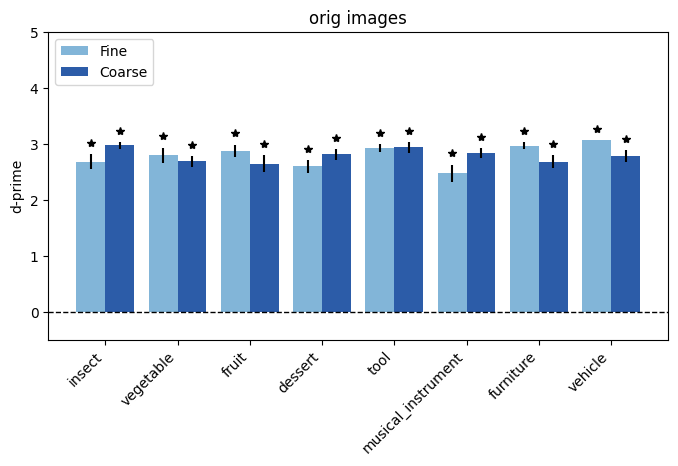

In [5]:

vals = dprime_by_supcat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

print(np.all(pvals_fdr<0.01))


for ii in range(5):


    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,1,1)

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = np.arange(n_super)+xjitters[cc]

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')

        # vals = d[:,cc,:]
        # t, p = scipy.stats.ttest_1samp(vals, popmean=0, alternative='greater')

        for sc in range(n_super):

            if pvals_fdr[cc,ii,sc]<0.01:
                height = meanvals[cc,sc]+semvals[cc,sc]+0.20
                plt.plot(x[sc], height, '*', color='k')

    plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right');

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])

    ax.legend(lh, cue_level_names, loc='upper left')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.title('%s images'%(image_type_names[ii]))